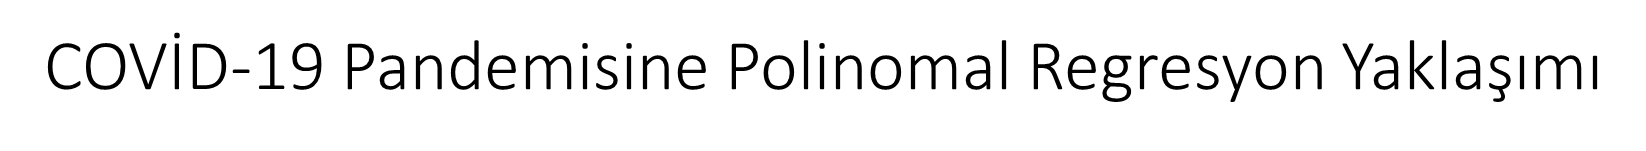

In [0]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

In [0]:
#@title Data Preparation(Data Slice=0.33)
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-18-2020.csv')


####
cols = confirmed_df.keys()

confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]


##############

dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 
germany_cases = [] 
uk_cases = []
tr_cases = [] 

china_deaths = [] 
italy_deaths = []
us_deaths = [] 
spain_deaths = [] 
france_deaths = [] 
germany_deaths = [] 
uk_deaths = [] 
tr_deaths = []

china_recoveries = [] 
italy_recoveries = []
us_recoveries = [] 
spain_recoveries = [] 
france_recoveries = [] 
germany_recoveries = [] 
uk_recoveries = [] 
tr_recoveries = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    # case studies 
    china_cases.append(confirmed_df[confirmed_df['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_df[confirmed_df['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_df[confirmed_df['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_df[confirmed_df['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_df[confirmed_df['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_df[confirmed_df['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_df[confirmed_df['Country/Region']=='United Kingdom'][i].sum())
    tr_cases.append(confirmed_df[confirmed_df['Country/Region']=='Turkey'][i].sum())

    china_deaths.append(deaths_df[deaths_df['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_df[deaths_df['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_df[deaths_df['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_df[deaths_df['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_df[deaths_df['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_df[deaths_df['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_df[deaths_df['Country/Region']=='United Kingdom'][i].sum())
    tr_deaths.append(deaths_df[deaths_df['Country/Region']=='Turkey'][i].sum())

    china_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='United Kingdom'][i].sum())
    tr_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Turkey'][i].sum())


#######################
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

# confirmed cases
world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)
germany_daily_increase = daily_increase(germany_cases)
uk_daily_increase = daily_increase(uk_cases)
tr_daily_increase = daily_increase(tr_cases)

# deaths
world_daily_death = daily_increase(total_deaths)
china_daily_death = daily_increase(china_deaths)
italy_daily_death = daily_increase(italy_deaths)
us_daily_death = daily_increase(us_deaths)
spain_daily_death = daily_increase(spain_deaths)
france_daily_death = daily_increase(france_deaths)
germany_daily_death = daily_increase(germany_deaths)
uk_daily_death = daily_increase(uk_deaths)
tr_daily_death = daily_increase(tr_deaths)

# recoveries
world_daily_recovery = daily_increase(total_recovered)
china_daily_recovery = daily_increase(china_recoveries)
italy_daily_recovery = daily_increase(italy_recoveries)
us_daily_recovery = daily_increase(us_recoveries)
spain_daily_recovery = daily_increase(spain_recoveries)
france_daily_recovery = daily_increase(france_recoveries)
germany_daily_recovery = daily_increase(germany_recoveries)
uk_daily_recovery = daily_increase(uk_recoveries)
tr_daily_recovery = daily_increase(tr_recoveries)
#####################################
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)



########################
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]




#############
import datetime
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))



####################

from sklearn.model_selection import train_test_split
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.03, shuffle=False)# Dünya verisi

###################
# Vaka sayısı tr
X_train_confirmedtr, X_test_confirmedtr, y_train_confirmedtr, y_test_confirmedtr = train_test_split(days_since_1_22, tr_cases, test_size=0.03, shuffle=False)#tr verisine göre
# ölüm sayısı tr
X_train_deadtr, X_test_deadtr, y_train_deadtr, y_test_deadtr = train_test_split(days_since_1_22, tr_deaths, test_size=0.03, shuffle=False)#tr verisine göre

# İyileşen sayısı tr
X_train_recovredtr, X_test_recovredtr, y_train_recovredtr, y_test_recovredtr = train_test_split(days_since_1_22, tr_recoveries, test_size=0.03, shuffle=False)#tr verisine göre






In [0]:
#@title Vaka-Ölüm-İyileşen Hasta Grafiği Çizmek için Fonksiyon
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
def country_plot(x, y1, y2, y3, y4, country):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y1,'rx')
    plt.title('{} Toplam Vaka Sayısı'.format(country), size=30,c='red')
    plt.xlabel('22/01/2020\'den Beri Günler', size=30,c='cyan')
    plt.ylabel(' Hasta Sayısı', size=30,c='cyan')
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y2)
    plt.title('{} Günlük vaka sayısı'.format(country), size=30,c='red')
    plt.xlabel('22/01/2020\'den Beri Günler', size=30,c='cyan')
    plt.ylabel('Hasta Sayısı', size=30,c='cyan')
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y3)
    plt.title('{} Günlük Ölüm Sayısı '.format(country), size=30,c='red')
    plt.xlabel('22/01/2020\'den Beri Günler', size=30,c='cyan')
    plt.ylabel('Hasta Sayısı', size=30,c='cyan')
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y4)
    plt.title('{} Günlük İyileşen Hasta Sayısı'.format(country), size=30,c='red')
    plt.xlabel('22/01/2020\'den Beri Günler', size=30,c='cyan')
    plt.ylabel(' Vaka Sayısı', size=30,c='cyan')
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()













In [0]:
#@title Model Visualization
def Model_Grafik(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('Zamana Göre Vaka Sayısı Tablosu', size=30,c='red')
    plt.xlabel('22/01/2020\'den Beri Günler', size=30,c='cyan')
    plt.ylabel('Vaka Sayısı', size=30,c='cyan')
    plt.legend(['Onaylanan Vaka', algo_name], prop={'size': 20})
    plt.xticks(size=30)
    plt.yticks(size=30)
    plt.show()

# Dünya Durum

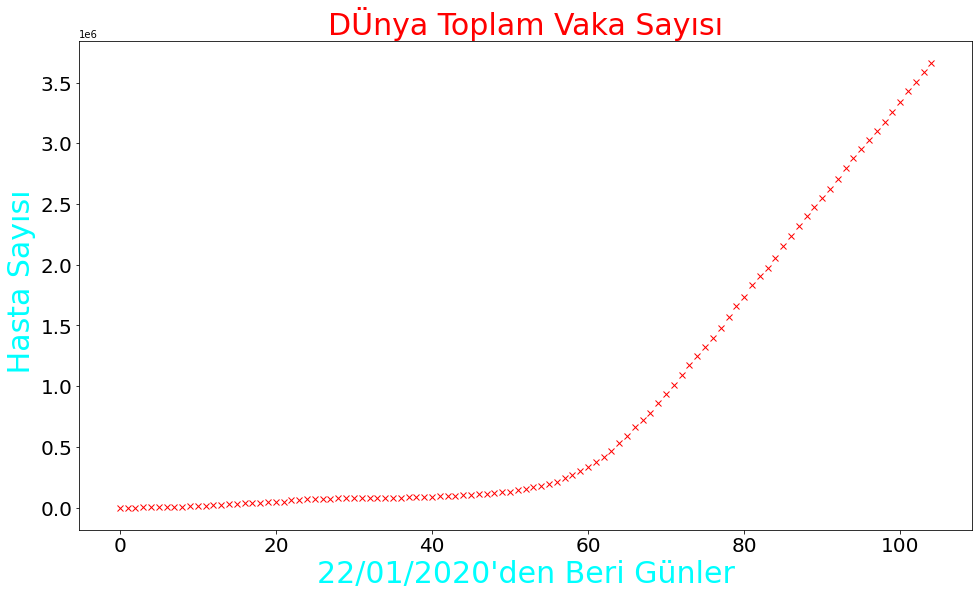

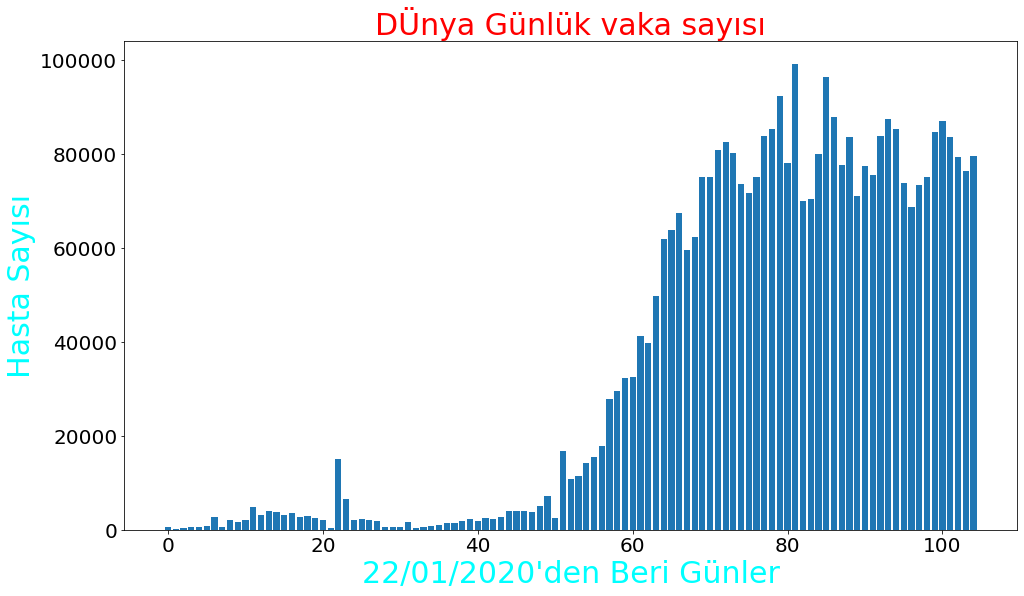

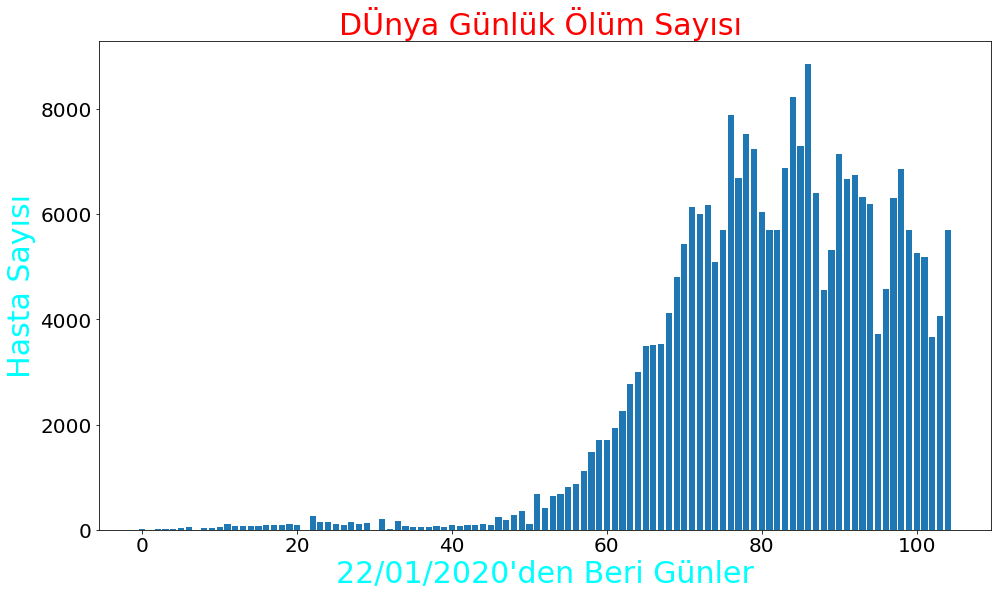

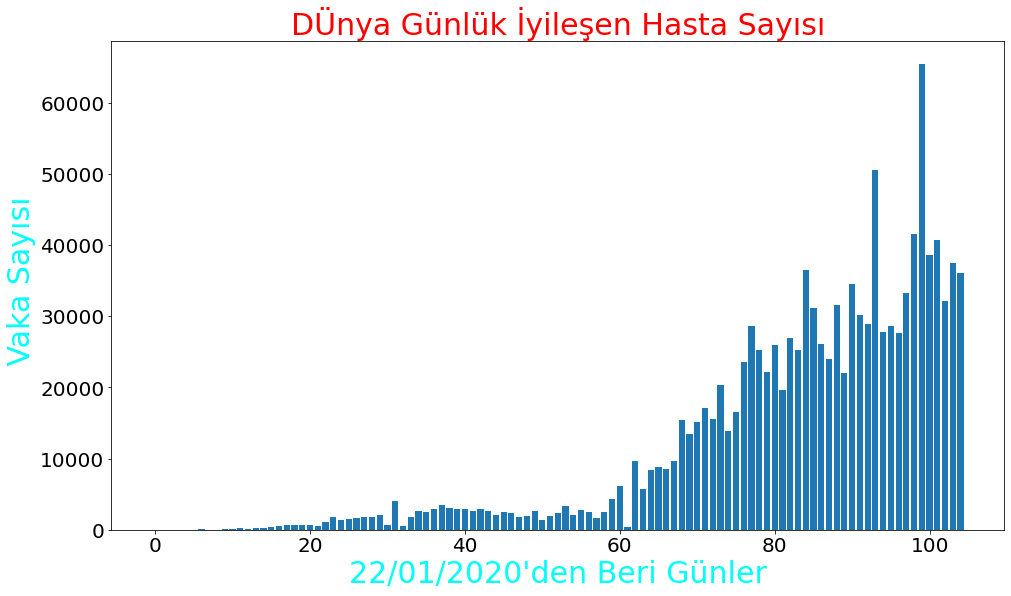

In [5]:
country_plot(adjusted_dates, world_cases, world_daily_increase, world_daily_death, world_daily_recovery, 'DÜnya')

# Türkiye Durum


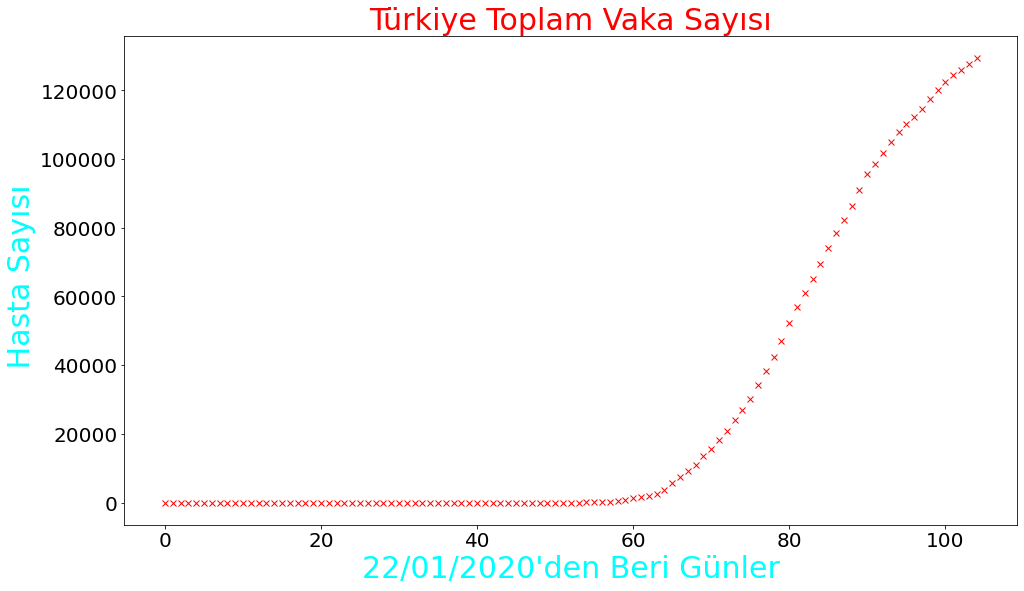

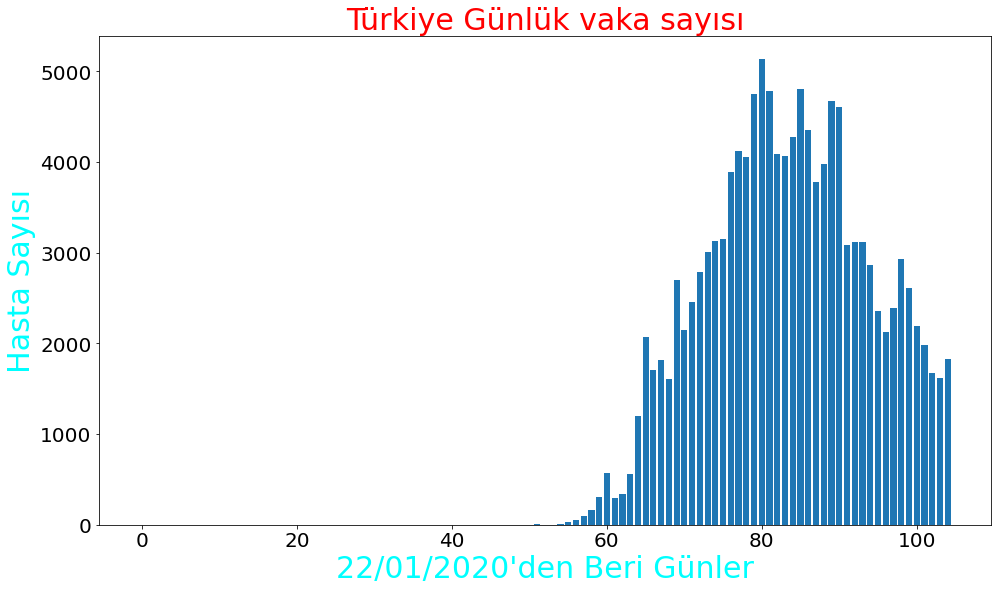

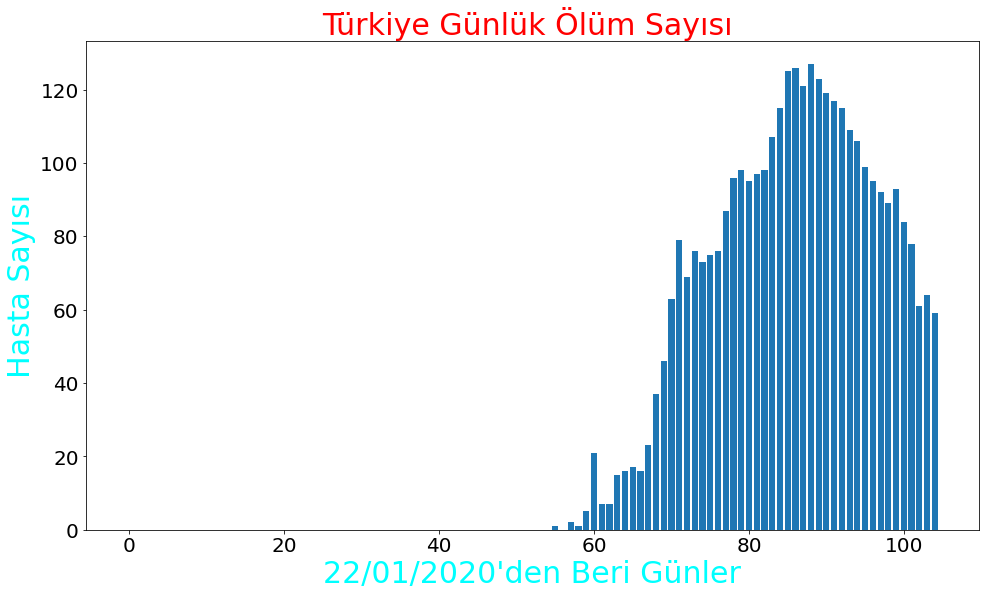

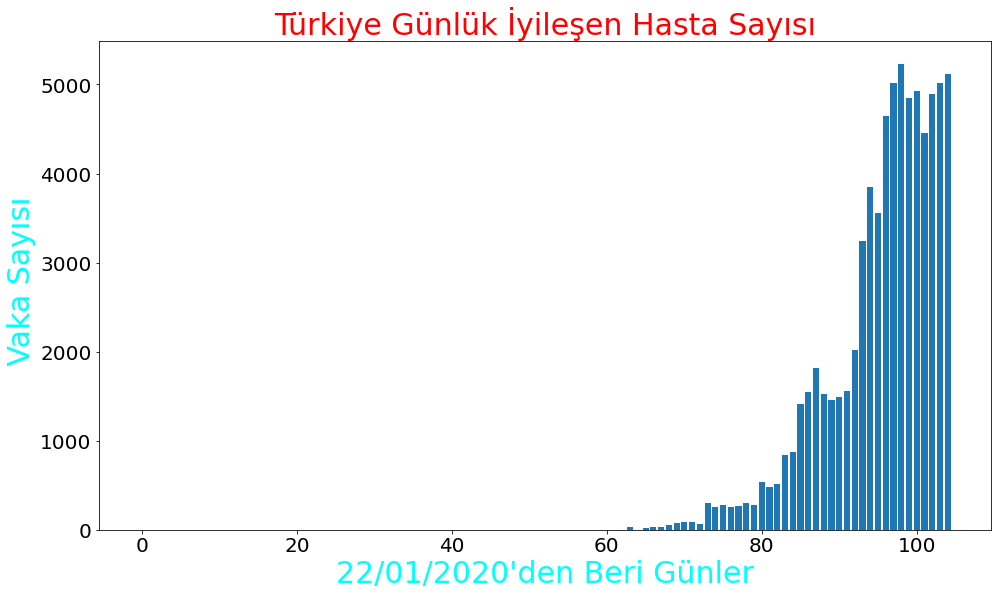

In [6]:
country_plot(adjusted_dates, tr_cases, tr_daily_increase, tr_daily_death, tr_daily_recovery, 'Türkiye')

# İtalya

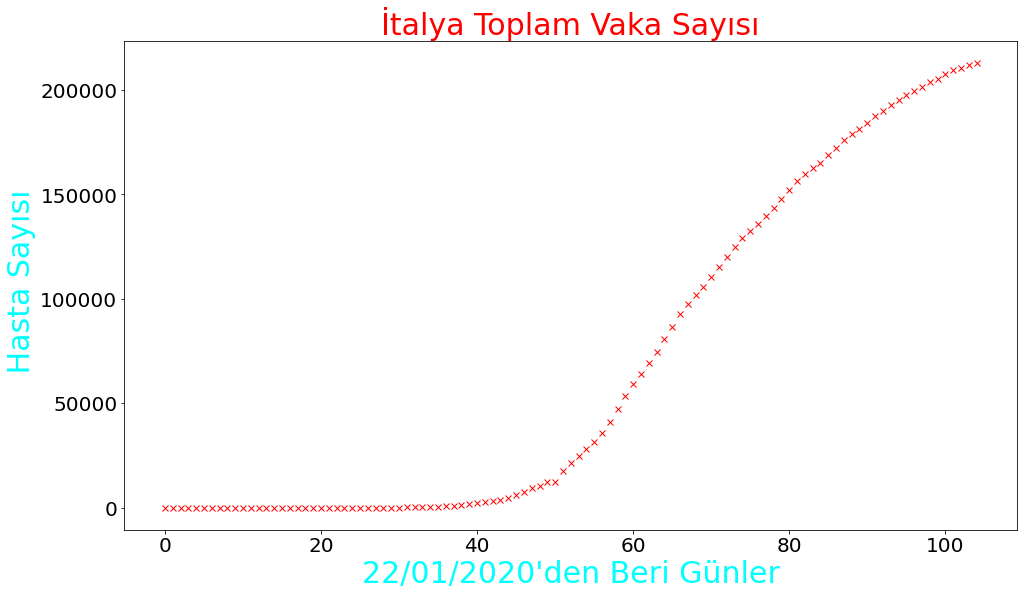

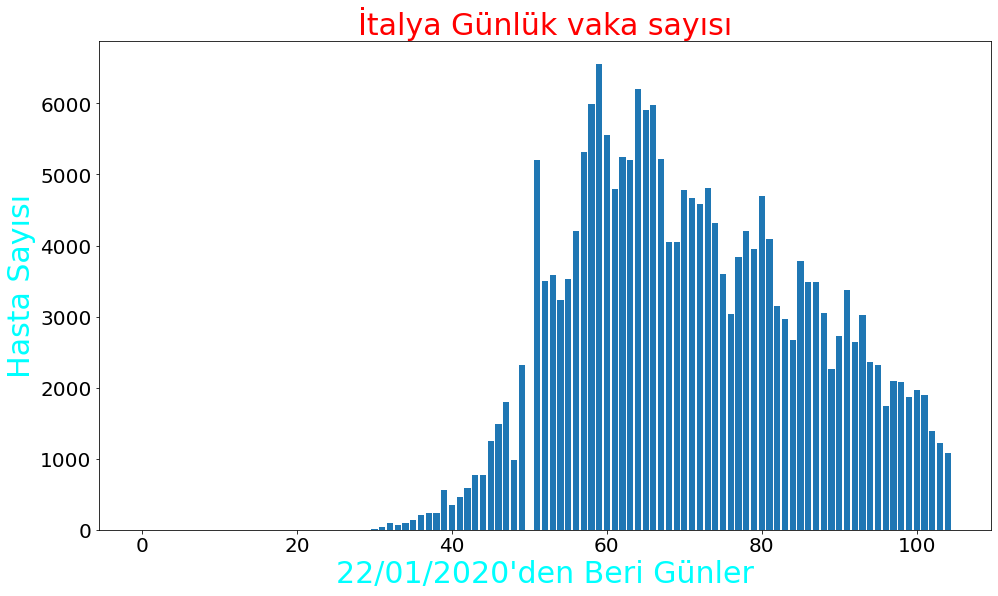

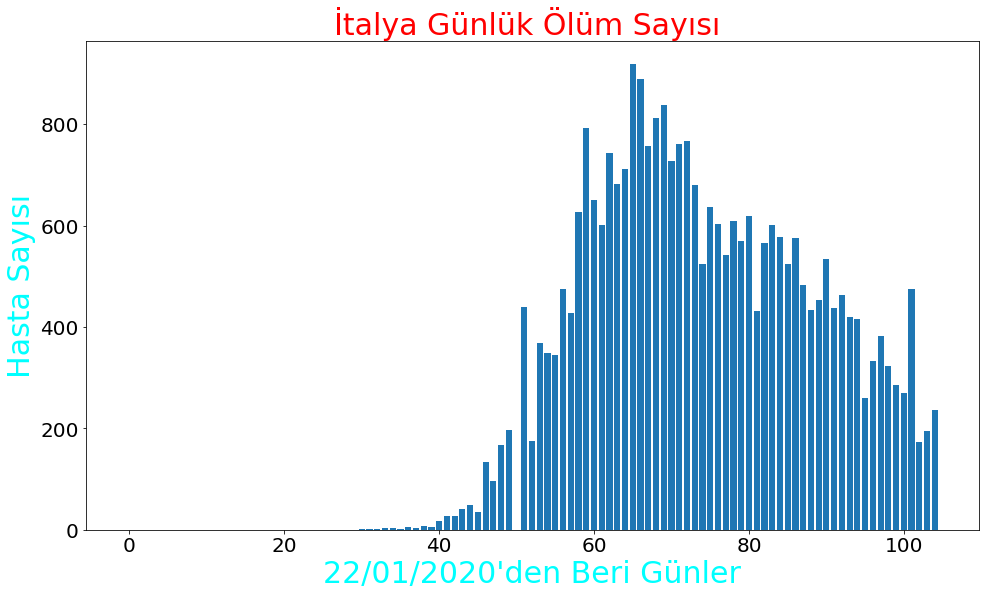

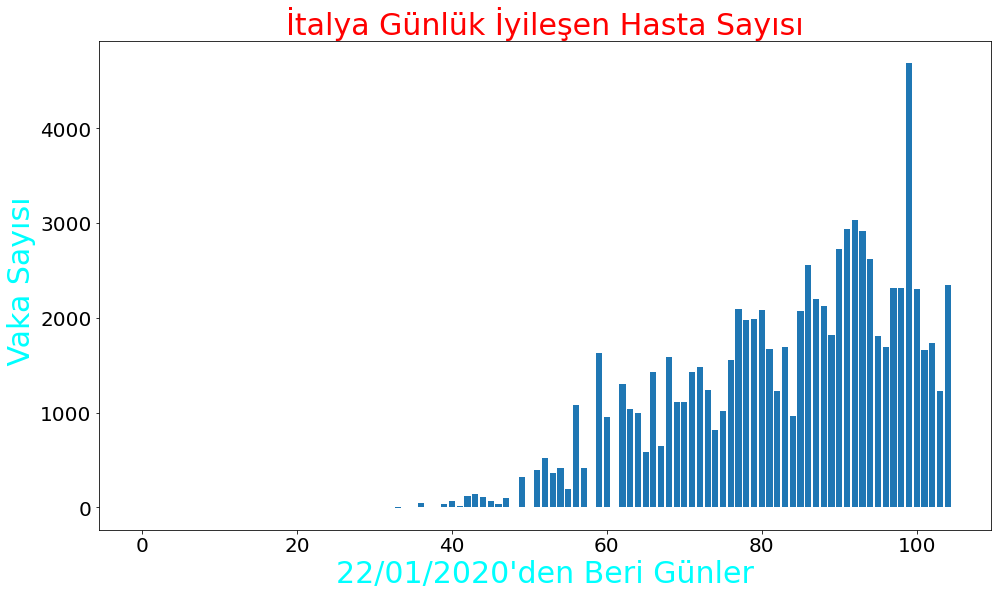

In [7]:
country_plot(adjusted_dates, italy_cases, italy_daily_increase, italy_daily_death, italy_daily_recovery, 'İtalya')

# USA

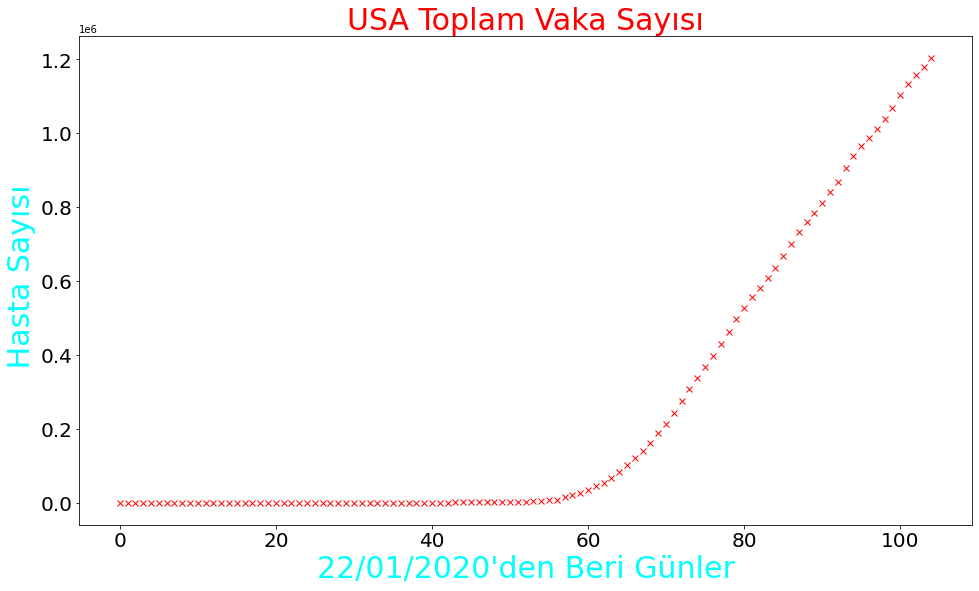

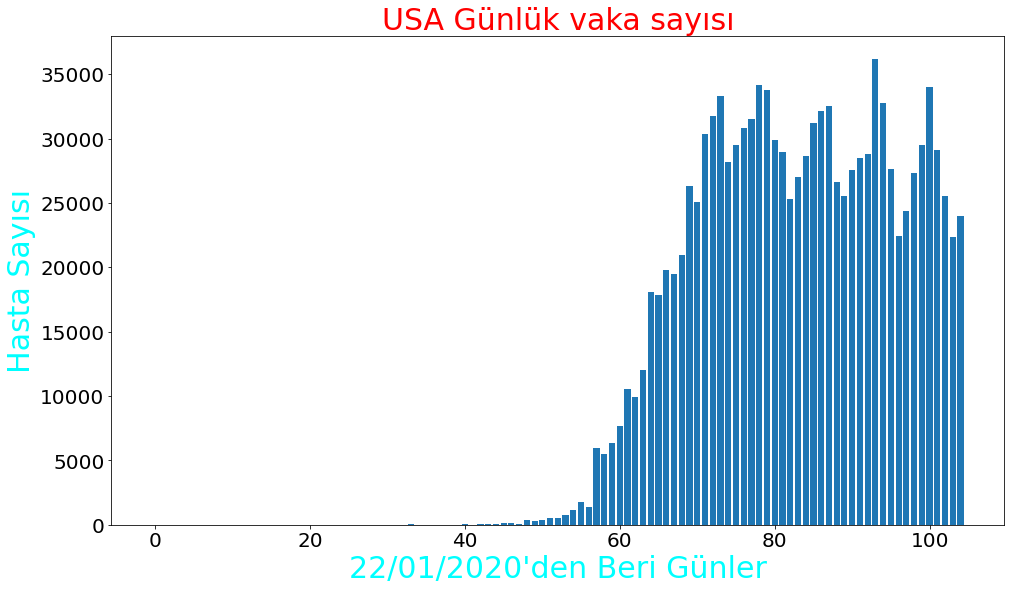

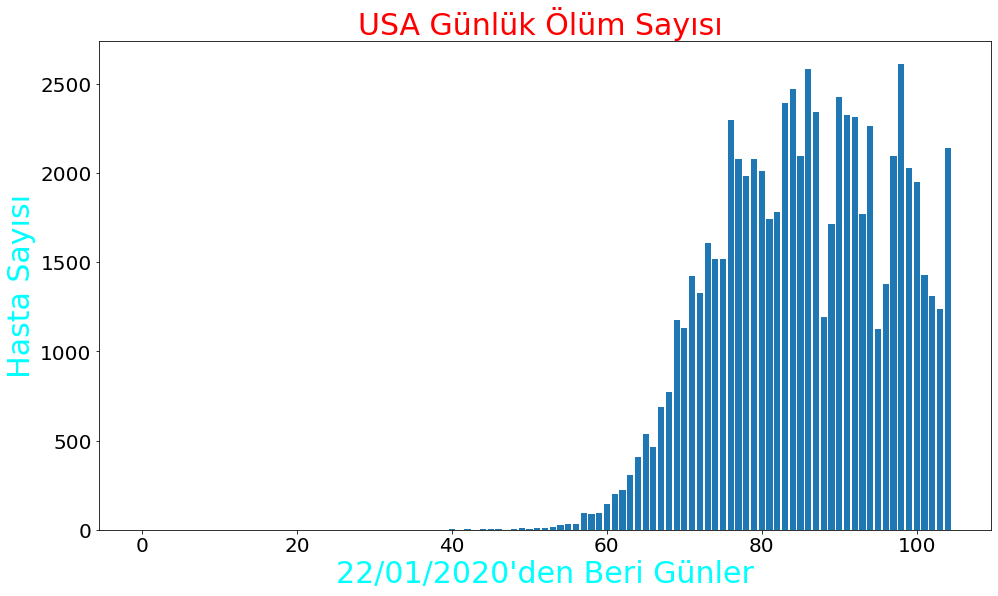

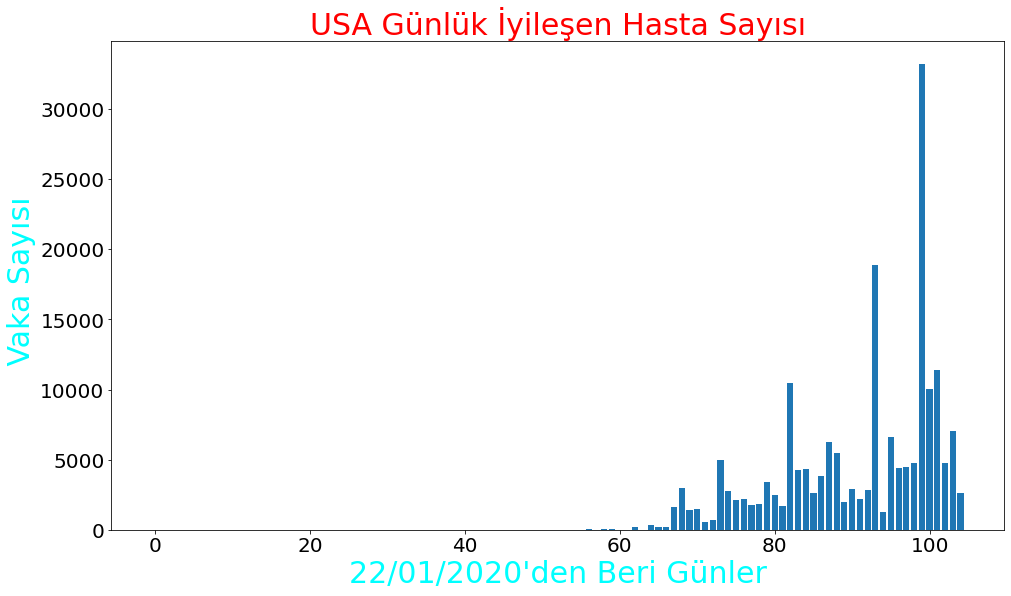

In [8]:
country_plot(adjusted_dates, us_cases,us_daily_increase, us_daily_death, us_daily_recovery, 'USA')

# Polinomal Regresyon

## Dünya

In [9]:
#@title Dünya Verisine Göre Eğitilmiş Modele HyperParametre Analizi 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


derece=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
mae=[]
mse=[]

########################
for i in derece:
  poly = PolynomialFeatures(degree=i)
  poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
  poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
  poly_future_forcast = poly.fit_transform(future_forcast)
  from sklearn.metrics import mean_squared_error, mean_absolute_error
  linear_model = LinearRegression(normalize=True, fit_intercept=True)# Yeniden Lineer Model nesnesi üretilir

  linear_model.fit(poly_X_train_confirmed, y_train_confirmed)


  test_linear_pred = linear_model.predict(poly_X_test_confirmed)
  linear_pred = linear_model.predict(poly_future_forcast)
  # Başarı ölçümü
  mae_val=round(mean_absolute_error(test_linear_pred, y_test_confirmed),2)
  mse_val=round(mean_squared_error(test_linear_pred, y_test_confirmed),2)

  print('MAE:', mae_val)
  print('MSE:',mse_val)
  mae.append(mae_val)
  mse.append(mse_val)
  print("Şuan Polinom Derecesi:",i,'\n')

sort1=sorted(mse)
sort2=sorted(mae)

print("\n\nEn iyi MSE Değeri {}. En iyi MAE değeri:{}".format(sort1[0],sort2[0]))




MAE: 27271.3
MSE: 1157949231.38
Şuan Polinom Derecesi: 2 

MAE: 396946.7
MSE: 161828204697.08
Şuan Polinom Derecesi: 3 

MAE: 84599.34
MSE: 7228891398.22
Şuan Polinom Derecesi: 4 

MAE: 234552.24
MSE: 60260151512.16
Şuan Polinom Derecesi: 5 

MAE: 147263.49
MSE: 23618717833.99
Şuan Polinom Derecesi: 6 

MAE: 76562.41
MSE: 7913237980.45
Şuan Polinom Derecesi: 7 

MAE: 112725.2
MSE: 16579325687.43
Şuan Polinom Derecesi: 8 

MAE: 26556.16
MSE: 857957165.91
Şuan Polinom Derecesi: 9 

MAE: 124840.9
MSE: 20629653077.35
Şuan Polinom Derecesi: 10 

MAE: 8468.94
MSE: 93119629.08
Şuan Polinom Derecesi: 11 

MAE: 188932.42
MSE: 56890791083.88
Şuan Polinom Derecesi: 12 

MAE: 146418.67
MSE: 34253932135.19
Şuan Polinom Derecesi: 13 

MAE: 35098.7
MSE: 2409372218.33
Şuan Polinom Derecesi: 14 

MAE: 110218.14
MSE: 20296477611.77
Şuan Polinom Derecesi: 15 

MAE: 457383.2
MSE: 370132409555.44
Şuan Polinom Derecesi: 16 

MAE: 635323.75
MSE: 725702908103.27
Şuan Polinom Derecesi: 17 

MAE: 693501.87
MSE:

In [10]:
#@title Dünya Verisine Göre Eğitilmiş Model
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=11)

polyhiper_X_train_confirmed = poly.fit_transform(X_train_confirmed)
polyhiper_X_test_confirmed = poly.fit_transform(X_test_confirmed)
polyhiper_future_forcast = poly.fit_transform(future_forcast)

from sklearn.metrics import mean_squared_error, mean_absolute_error
linear_model_hiper = LinearRegression(normalize=True, fit_intercept=True)# Yeniden Lineer Model nesnesi üretilir

linear_model_hiper.fit(polyhiper_X_train_confirmed, y_train_confirmed)


test_linear_pred = linear_model_hiper.predict(polyhiper_X_test_confirmed)#predict
linear_pred = linear_model_hiper.predict(polyhiper_future_forcast)

score_poli_hiper=linear_model_hiper.score(polyhiper_X_test_confirmed,y_test_confirmed)

print("R^2 Değeri:",round(score_poli_hiper,2))
print('MAE:', round(mean_absolute_error(test_linear_pred, y_test_confirmed),2))
print('MSE:',round(mean_squared_error(test_linear_pred, y_test_confirmed),2))


R^2 Değeri: 0.99
MAE: 8468.94
MSE: 93119629.08


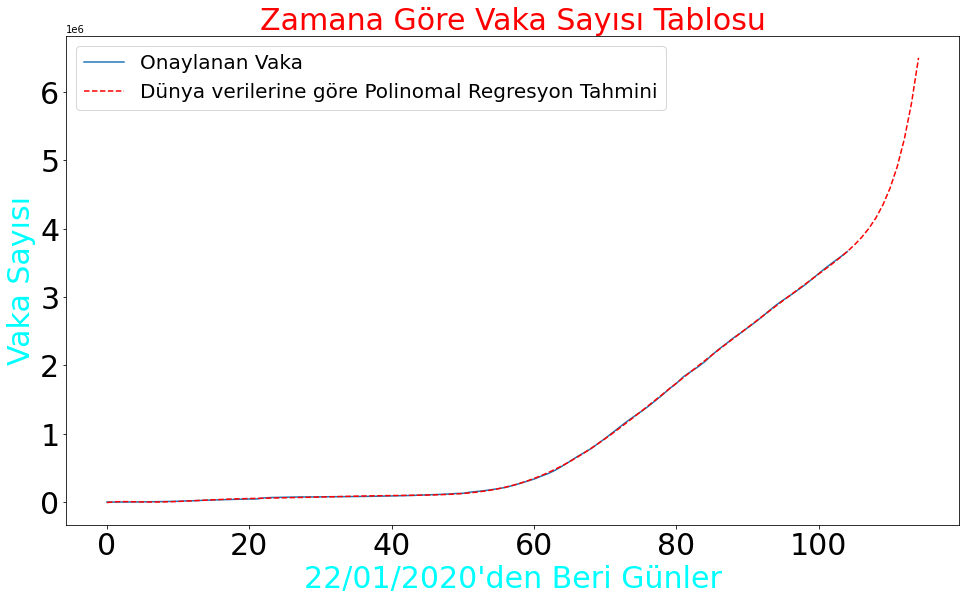

In [11]:
Model_Grafik(adjusted_dates, world_cases, linear_pred, 'Dünya verilerine göre Polinomal Regresyon Tahmini', 'red')

## Türkiye

In [12]:
#@title Türkiye Verilerine Göre HiperParametre Analizi { display-mode: "form" }
# Türkiye Verilerine Göre HİperParametre Analizi

derece=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
mae=[]
mse=[]
########################
for i in derece:
  poly = PolynomialFeatures(degree=i)
  poly_X_train_confirmedtr = poly.fit_transform(X_train_confirmedtr)
  poly_X_test_confirmedtr = poly.fit_transform(X_test_confirmedtr)
  poly_future_forcasttr = poly.fit_transform(future_forcast)

  from sklearn.metrics import mean_squared_error, mean_absolute_error
  linear_model = LinearRegression(normalize=True, fit_intercept=True)# Yeniden Lineer Model nesnesi üretilir

  linear_model.fit(poly_X_train_confirmedtr, y_train_confirmedtr)


  test_linear_pred_tr = linear_model.predict(poly_X_test_confirmedtr)
  linear_pred=future_tr = linear_model.predict(poly_future_forcasttr)

  # Başarı ölçümü
  mae_val=round(mean_absolute_error(test_linear_pred_tr, y_test_confirmedtr),2)
  mse_val=round(mean_squared_error(test_linear_pred_tr, y_test_confirmedtr),2)

  print('MAE:', mae_val)
  print('MSE:',mse_val)
  mae.append(mae_val)
  mse.append(mse_val)
  print("Şuan Polinom Derecesi:",i,'\n')

sort1=sorted(mse)
sort2=sorted(mae)

print("\n\nEn iyi MSE Değeri {}. En iyi MAE değeri:{}".format(sort1[0],sort2[0]))

MAE: 3274.56
MSE: 16307220.43
Şuan Polinom Derecesi: 2 

MAE: 28575.58
MSE: 846985705.26
Şuan Polinom Derecesi: 3 

MAE: 20870.47
MSE: 452496165.02
Şuan Polinom Derecesi: 4 

MAE: 1760.93
MSE: 5488787.05
Şuan Polinom Derecesi: 5 

MAE: 15232.97
MSE: 268394807.47
Şuan Polinom Derecesi: 6 

MAE: 10753.06
MSE: 133640974.31
Şuan Polinom Derecesi: 7 

MAE: 1781.35
MSE: 5396981.6
Şuan Polinom Derecesi: 8 

MAE: 7895.69
MSE: 86380519.2
Şuan Polinom Derecesi: 9 

MAE: 5654.73
MSE: 44684086.74
Şuan Polinom Derecesi: 10 

MAE: 3649.75
MSE: 18397775.39
Şuan Polinom Derecesi: 11 

MAE: 6541.14
MSE: 61283512.08
Şuan Polinom Derecesi: 12 

MAE: 8449.14
MSE: 104456276.32
Şuan Polinom Derecesi: 13 

MAE: 4701.04
MSE: 29605959.06
Şuan Polinom Derecesi: 14 

MAE: 2224.07
MSE: 5574327.76
Şuan Polinom Derecesi: 15 

MAE: 6106.6
MSE: 53888840.06
Şuan Polinom Derecesi: 16 

MAE: 2849.82
MSE: 19392000.19
Şuan Polinom Derecesi: 17 

MAE: 51096.67
MSE: 5241640384.4
Şuan Polinom Derecesi: 18 

MAE: 123505.01
MS

In [0]:
#@title Polinomal Regresyonun Türkiye Modeli
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
# Vaka SAyısı
polyhiper_X_train_confirmedtr = poly.fit_transform(X_train_confirmedtr)
polyhiper_X_test_confirmedtr = poly.fit_transform(X_test_confirmedtr)
# ÖLüm SAyısı
polyhiper_X_train_deadtr = poly.fit_transform(X_train_deadtr)
polyhiper_X_test_deadtr = poly.fit_transform(X_test_deadtr)

#İyileşen sayısı
polyhiper_X_train_recovredtr = poly.fit_transform(X_train_recovredtr)
polyhiper_X_test_recovredtr = poly.fit_transform(X_test_recovredtr)
######################

polyhiper_future_forcast = poly.fit_transform(future_forcast)
# MODEL
linear_model_hipertrcase = LinearRegression(normalize=True, fit_intercept=True)# Yeniden Lineer Model nesnesi üretilir
linear_model_hipertrdead = LinearRegression(normalize=True, fit_intercept=True)
linear_model_hipertrrecovred = LinearRegression(normalize=True, fit_intercept=True)
#FİTTİNG
linear_model_hipertrcase.fit(polyhiper_X_train_confirmedtr, y_train_confirmedtr)
linear_model_hipertrdead.fit(polyhiper_X_train_deadtr, y_train_deadtr)
linear_model_hipertrrecovred.fit(polyhiper_X_train_recovredtr, y_train_recovredtr)
#predict metris
test_linear_pred_case = linear_model_hipertrcase.predict(polyhiper_X_test_confirmedtr)
test_linear_pred_dead = linear_model_hipertrdead.predict(polyhiper_X_test_deadtr)
test_linear_pred_recovred = linear_model_hipertrrecovred.predict(polyhiper_X_test_recovredtr)
# predict future
linear_pred_trcase = linear_model_hipertrcase.predict(polyhiper_future_forcast)
linear_pred_trdead = linear_model_hipertrdead.predict(polyhiper_future_forcast)
linear_pred_trrecovred = linear_model_hipertrrecovred.predict(polyhiper_future_forcast)

In [31]:
son = linear_model_hipertrcase.predict(polyhiper_future_forcast+41)
son[-1]

881.614919094769

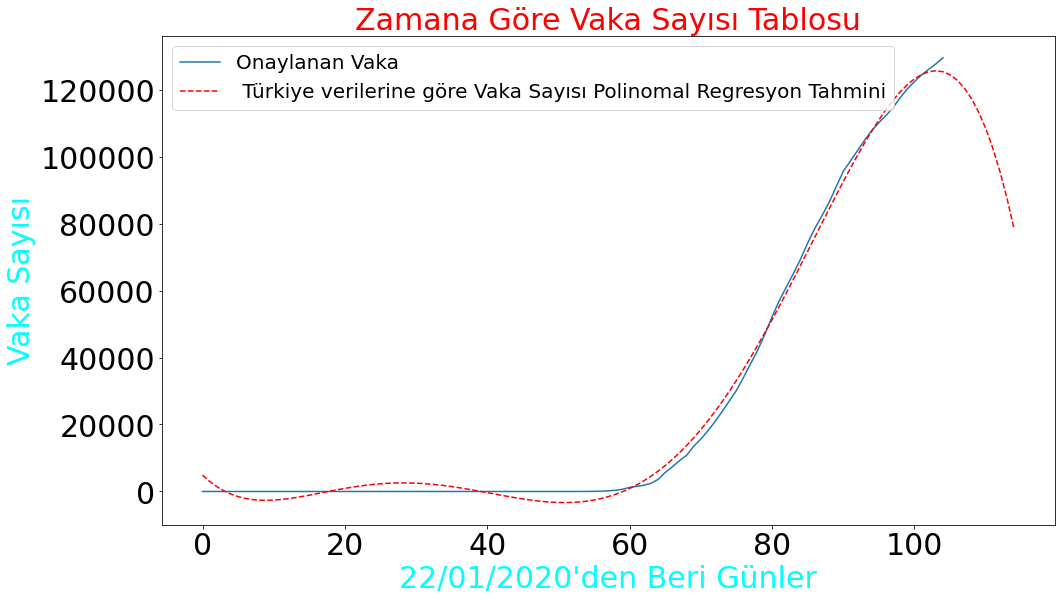

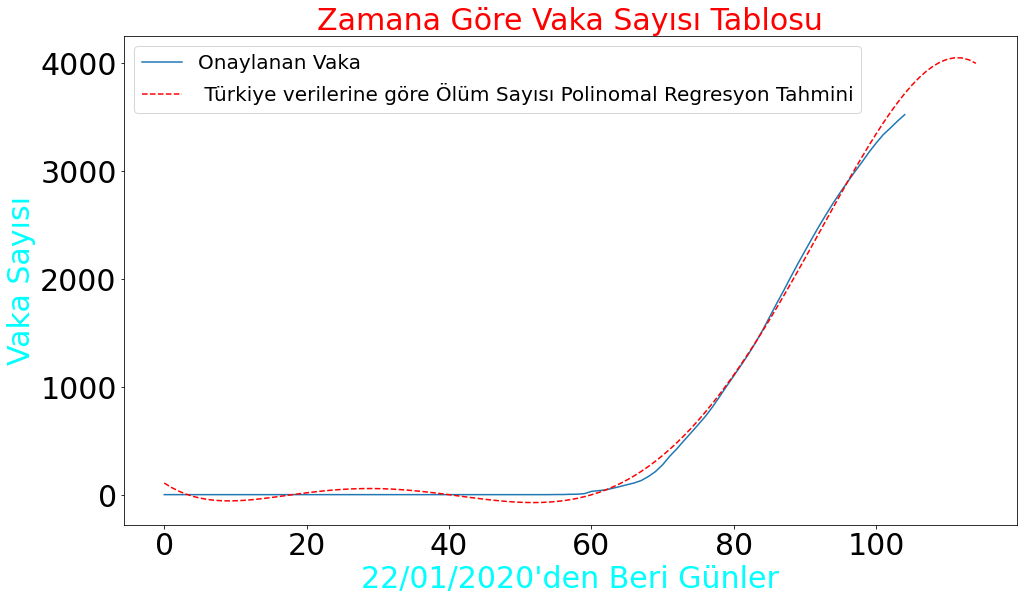

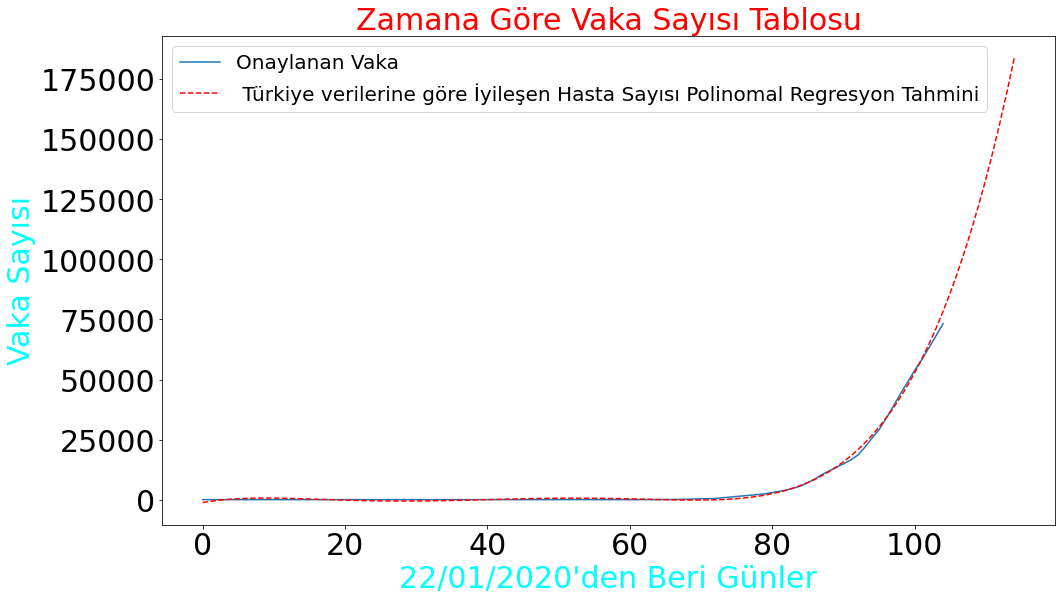

In [15]:
# TR MODELİ Grafik
Model_Grafik(adjusted_dates, tr_cases, linear_pred_trcase, ' Türkiye verilerine göre Vaka Sayısı Polinomal Regresyon Tahmini', 'red')
Model_Grafik(adjusted_dates, tr_deaths, linear_pred_trdead, ' Türkiye verilerine göre Ölüm Sayısı Polinomal Regresyon Tahmini', 'red')
Model_Grafik(adjusted_dates, tr_recoveries, linear_pred_trrecovred, ' Türkiye verilerine göre İyileşen Hasta Sayısı Polinomal Regresyon Tahmini', 'red')